In [1]:
import mglearn
mglearn.plots.plot_knn_regression(n_neighbors=1)

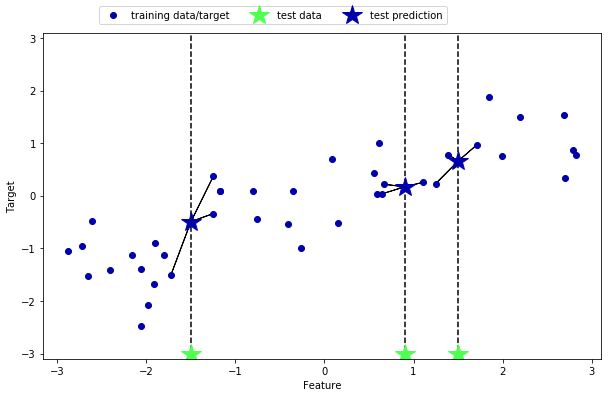

In [2]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

x , y = mglearn.datasets.make_wave(n_samples=40)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [4]:
reg.predict(x_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [13]:
print('R^2 score: {:.2f}'.format(reg.score(x_test, y_test)))

R^2 score: 0.83


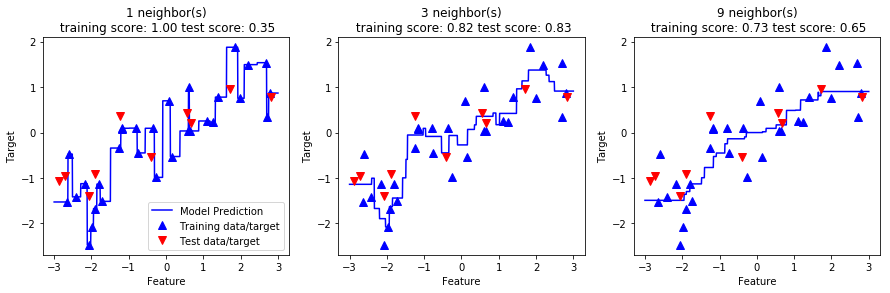

In [29]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15,4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(x_train, y_train)
    ax.plot(line, reg.predict(line), c='blue')
    ax.plot(x_train, y_train, '^', c='blue', markersize=8)
    ax.plot(x_test, y_test, 'v', c='red', markersize=8)
    
    ax.set_title('{} neighbor(s)\n training score: {:.2f} test score: {:.2f}'.format(n_neighbors, reg.score(x_train, y_train), reg.score(x_test, y_test)))
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')

axes[0].legend(['Model Prediction', 'Training data/target', 'Test data/target'], loc='best')